In [1]:
import requests
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
jan = pd.read_csv('data/January17.csv', encoding='UTF-8')
feb = pd.read_csv('data/February17.csv', encoding='UTF-8')
march = pd.read_csv('data/March17.csv', encoding='UTF-8')
april = pd.read_csv('data/April17.csv', encoding='UTF-8')
may = pd.read_csv('data/May17.csv', encoding='UTF-8')
june = pd.read_csv('data/June17.csv', encoding='UTF-8')
july = pd.read_csv('data/July17.csv', encoding='UTF-8')
august = pd.read_csv('data/August17.csv', encoding='UTF-8')
september = pd.read_csv('data/September17.csv', encoding='UTF-8')
october = pd.read_csv('data/October17.csv', encoding='UTF-8')

In [3]:
jan = jan[['Date', 'Who', 'What', 'Link', 'Best', 'Worst', 'Score (1-10)', 'Year']]
feb = feb[['Date', 'Who', 'What', 'Link', 'Best', 'Score (1-10)','Year']]
march = march[['Date', 'Who', 'What', 'Link', 'Best', 'Score (1-10)', 'Year']]
april = april[['Date', 'Who', 'What', 'Link', 'Best', 'Score (1-10)', 'Year']]
may = may[['Date', 'Who', 'What', 'Link', 'Best', 'Score (1-10)', 'Year']]
june = june[['Date', 'Who', 'What', 'Link', 'Best', 'Score (1-10)', 'Unnamed: 7', 'Year']]
july = july[['Date', 'Who', 'What', 'Link', 'Best', 'Score (1-10)', 'Unnamed: 7', 'Year']]

In [4]:
jan['month'] = 'january'
feb['month'] = 'february'
march['month'] = 'march'
april['month'] = 'april'
may['month'] = 'may'
june['month'] = 'june'
july['month'] = 'july'
august['month'] = 'august'
september['month'] ='september'
october['month'] ='october'

In [5]:
feb = feb.drop(0)
march = march.drop([0, 32, 33, 34, 35, 36, 37, 38])
april = april.drop(0)
may = may.drop(0)
june = june.drop(0)
july = july.drop(0)
august = august.drop(0)
september  = september.drop([0,30])

In [7]:
allpd = pd.concat([jan, feb, march, april, may, june, july, august, september, october])
allpd.rename(columns={'Score (1-10)': 'Score'}, inplace=True)

In [8]:
allpd['Date'] = pd.to_datetime(allpd['Date'], format='dd/mm/yyyy', infer_datetime_format=True)

In [9]:
allpd['Score'] = allpd['Score'].map(lambda x: str(x).replace(',', '.'))
allpd['Score'] = allpd['Score'].astype(float)
scores = allpd['Score'].tolist()

In [10]:
scores_series = allpd.set_index('Date')['Score']

In [11]:
scores_series.describe()

count    285.000000
mean       8.156842
std        1.325560
min        0.000000
25%        7.600000
50%        8.000000
75%        9.000000
max       11.000000
Name: Score, dtype: float64

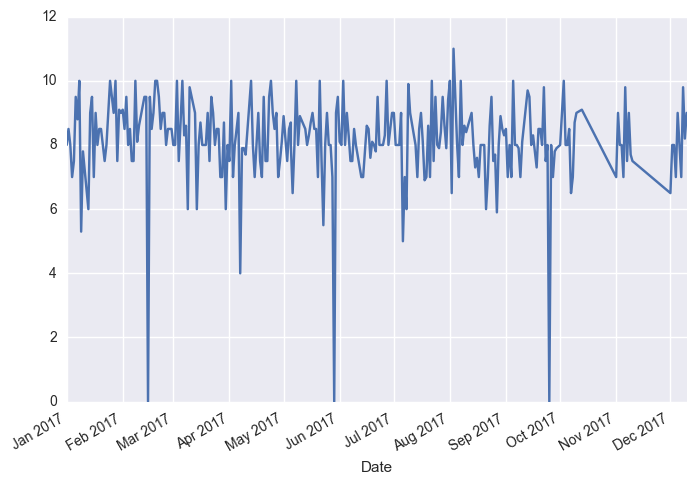

In [12]:
scores_series.plot()

jan
count    29.000000
mean      8.362069
std       1.143745
min       5.300000
25%       7.800000
50%       8.500000
75%       9.000000
max      10.000000
Name: Score, dtype: float64

june
count    28.000000
mean      8.235714
std       0.738975
min       7.000000
25%       7.950000
50%       8.000000
75%       8.500000
max      10.000000
Name: Score, dtype: float64

aug
count    29.000000
mean      8.131034
std       1.175373
min       5.900000
25%       7.500000
50%       8.000000
75%       8.600000
max      11.000000
Name: Score, dtype: float64

may
count    29.000000
mean      7.965517
std       1.811723
min       0.000000
25%       8.000000
50%       8.300000
75%       8.900000
max      10.000000
Name: Score, dtype: float64

oct
count    11.000000
mean      8.345455
std       0.994348
min       6.500000
25%       8.000000
50%       8.500000
75%       9.000000
max      10.000000
Name: Score, dtype: float64

july
count    29.000000
mean      8.127586
std       1.152914
min       5.

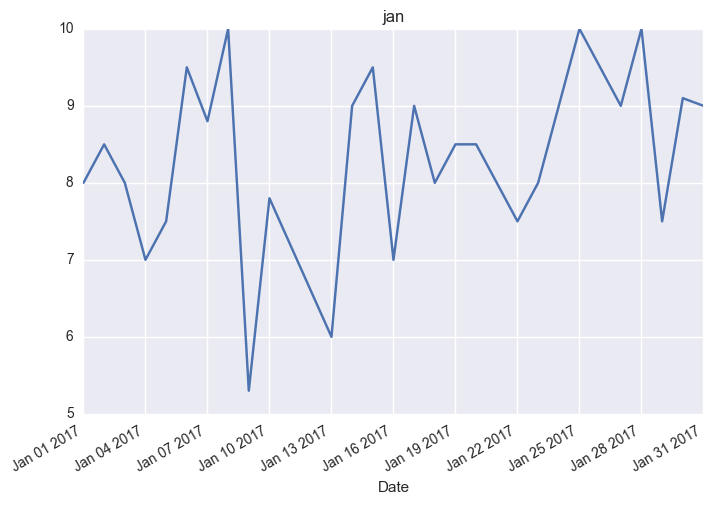

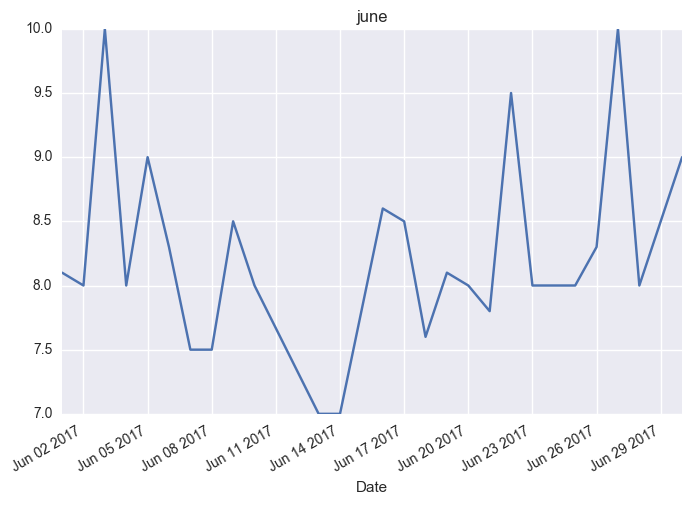

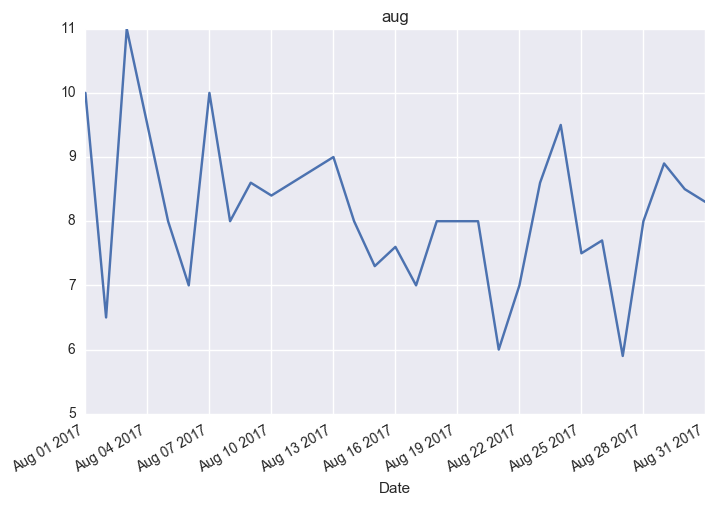

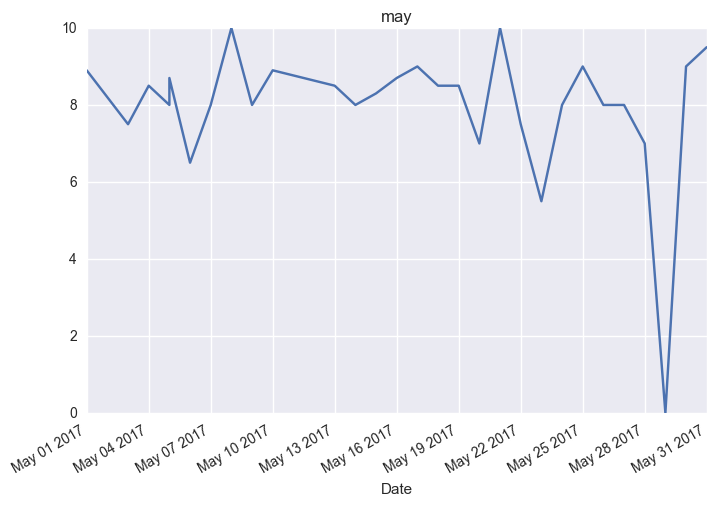

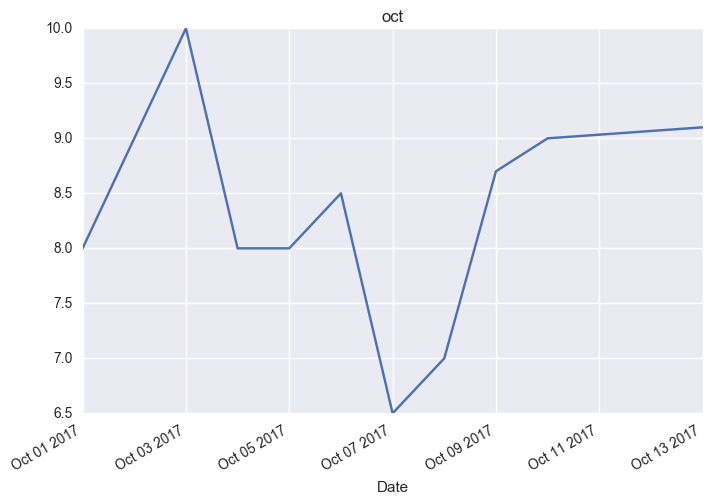

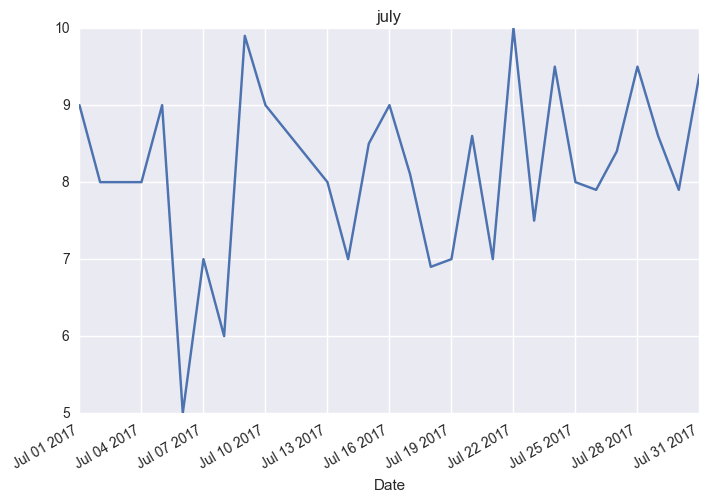

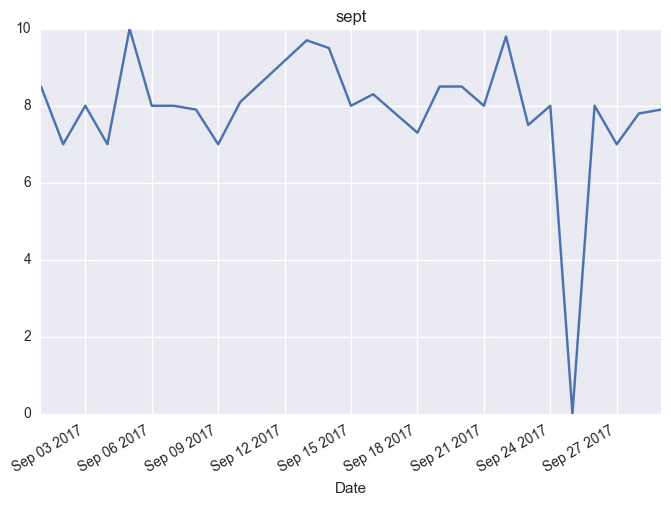

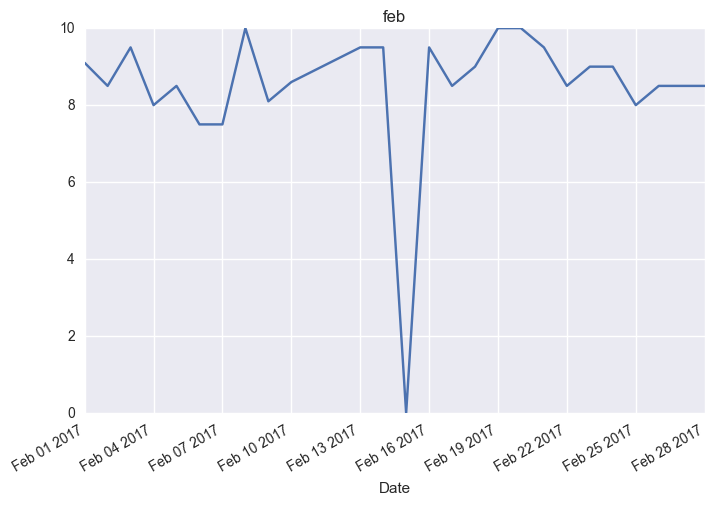

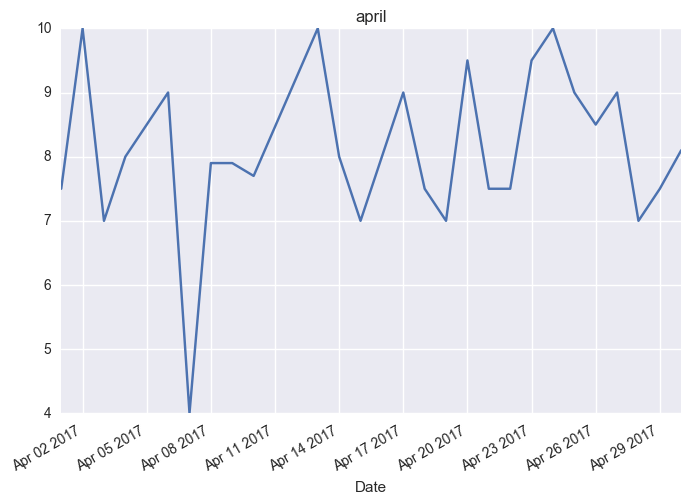

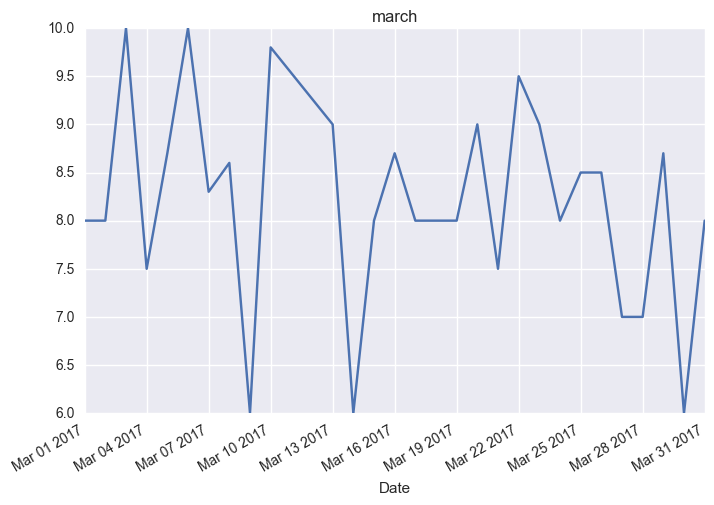

In [13]:
months_dates = {'jan': ['2017-01-01', '2017-01-31'], 
                'feb': ['2017-02-01', '2017-02-28'], 
                'march': ['2017-03-01', '2017-03-31'],
               'april': ['2017-04-01', '2017-04-30'], 
               'may': ['2017-05-01', '2017-05-31'],
               'june': ['2017-06-01', '2017-06-30'],
               'july': ['2017-07-01', '2017-07-31'],
               'aug': ['2017-08-01', '2017-08-31'],
               'sept': ['2017-09-01', '2017-09-30'],
               'oct': ['2017-10-01', '2017-10-13']}
for index in months_dates:
    plt.figure()
    plt.title(index)
    month = scores_series[months_dates[index][0]: months_dates[index][1]]
    month.plot()
    print(index)
    print(month.describe())
    print()

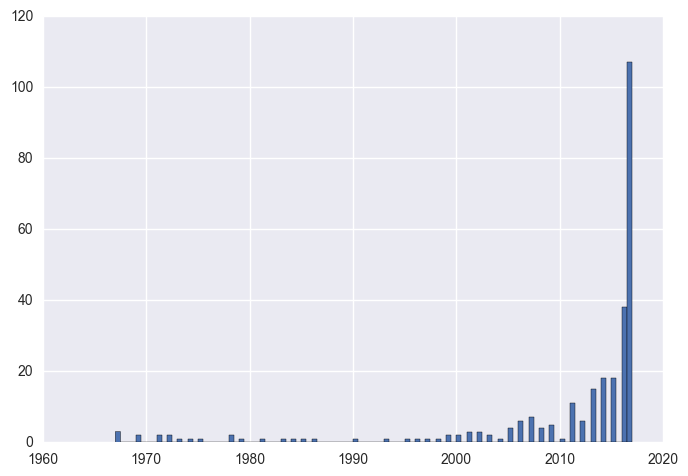

In [95]:
allpd['Year'].hist(bins=100)

In [15]:
normcolumns = ['Date', 'Who', 'What', 'Link', 'Best', 'Worst', 'Score', 'Year', 'month']
unnamded_columns = [x for x in allpd.columns if x not in normcolumns]
#unnamded_columns.append('Date')

In [16]:
alldata = allpd.reset_index()

In [22]:
emotions_raw = list(set(np.concatenate(allpd[unnamded_columns].values)))

In [18]:
emots = []
for c in unnamded_columns:
    emots.extend(alldata[c].dropna().index)

In [19]:
def nice_emotion_writer(index):
    piece = alldata.iloc[index]
    piece = piece.fillna('-')
    s = '{0} - {1}, {2}, score: {3}\n'.format(piece['Who'], piece['What'], piece['month'], piece['Score'])
    for c in unnamded_columns:
            if piece[c] != '-':
                s += "{0}\n".format(piece[c])
    return s

In [26]:
with open('albums_rare_expressions2.txt', 'w', encoding='utf-8') as wf:
    for i in emots:
        wf.write(nice_emotion_writer(i) + "\n\n")

In [28]:
excellent_albums = alldata[alldata['Score'] > 9.4][['Who', 'What', 'Score']]
excellent_albums.sort_values(by='Score', ascending=False);

In [29]:
bad_albums = alldata[alldata['Score'] < 7.1][['Who', 'What', 'Score']]
bad_albums.sort_values(by='Score', ascending=False);

In [25]:
#excellent_albums.to_csv('albums_with_rate_more_than_9-4.csv')
#bad_albums.to_csv('albums_with_rate_less_than_7-1.csv')
#norm_albums.to_csv('albums_with_rate_less_than_9-4_but_more_than_7-0.csv')

In [31]:
norm_albums = alldata[(alldata['Score'] > 7.0) & (alldata['Score'] <= 9.4)][['Who', 'What', 'Score']]
norm_albums.sort_values(by='Score', ascending=False);

In [88]:
#вытянуть жанры, посмотреть распределение оценок относительно жанров

In [32]:
albums2017 = alldata[alldata['Year'] == 2017.0]

In [34]:
bestalbums2017 = albums2017[albums2017['Score'] > 8.9]
bestalbums2017 = bestalbums2017.sort_values(by='Score', ascending=False)
bestalbums2017[['Who', 'What', 'Score']];

In [35]:
worstalbums2017 = albums2017[albums2017['Score'] < 7.5]
worstalbums2017 = worstalbums2017.sort_values(by='Score', ascending=False)
worstalbums2017[['Who', 'What', 'Score']];

In [30]:
# groupby singer

In [40]:
groupbysinger = alldata.groupby('Who').groups
groupbysinger.keys()

dict_keys(['Jack & Jack', 'Major Lazer', 'Mando Diao', 'Blood Cultures', 'Иван Дорн', 'Stella', 'Missy Elliott', ' Apollo Brown & Planet Asia', 'New Politics', 'Florence + The Machine', 'Justin Timberlake', 'Speedometer', 'Years & Years', 'Bad Sounds', 'The xx', 'Muse', 'MØ', 'Of Monsters and Men', 'Post Malone', 'Royal Blood', 'Julie Byrne', 'Daniel Shake', 'Tom Grennan', 'Anderson .Paak', 'Bad Boys Blue', 'Unseen Keys', 'Matt Wills', 'Charlie Puth', 'Depeche Mode', 'Mayer Hawthorne', 'Maroon 5', 'Foster The People', 'Everything Everything', 'White Lies', "Rag'n'Bone Man", 'Childish Gambino', 'Oddisee', 'Macintosh Plus', 'Dire Straits', 'Mr Jukes', 'Moby', 'Charlotte Cardin', 'Glass Animals', 'Jazmine Sullivan', 'Kings of Leon', 'Imagine Dragons', 'Jamie Lawson', 'St. Vincent', 'Jacob Sartorius', 'Coldplay', 'Bombay Bicycle Club', 'Elbow', 'Bee Gees', 'Syd', 'Toro Y Moi', 'N Sync', 'Parov Stelar', 'Meghan Trainor', 'Leon Vynehall', 'Zayn', 'Stevie Wonder', 'Marvin Gaye', 'Lana Del Rey

In [89]:
groupbysinger_df = pd.DataFrame(alldata.groupby(['Who']).count()['index'])
groupbysinger_df.sort_values(by='index', ascending=False, inplace=True)
groupbysinger_df['singer'] = groupbysinger_df.index
groupbysinger_df.index = list(range(len(groupbysinger_df)))
groupbysinger_df.head()

,index,singer
0,6,Muse
1,5,Rhodes
2,5,Panic! At The Disco
3,4,Matt Wills
4,4,Maroon 5


In [94]:
groupbysinger_df.to_csv("singers_popularity.csv", index=False, encoding='utf-8')

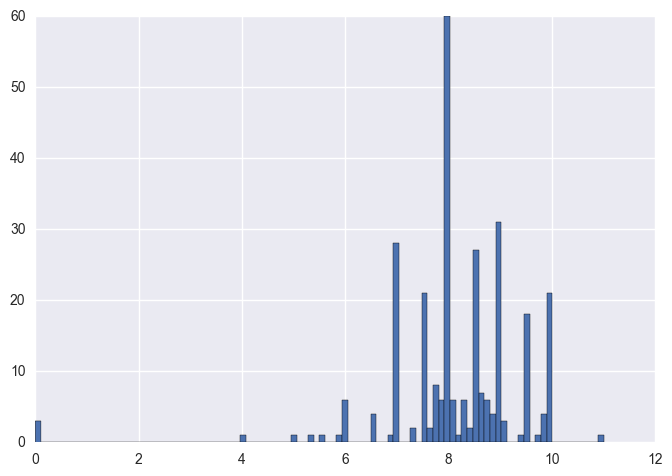

In [92]:
alldata['Score'].hist(bins=100)

In [93]:
#Counter(alldata['Score']).most_common()

In [108]:
url = 'https://music.yandex.ru/album/53485'
import requests
r = requests.get(url)

In [110]:
r.text

'<!DOCTYPE html><html><head><meta http-equiv="X-UA-Compatible" content="IE=EmulateIE7,IE=edge" /><meta http-equiv="Content-type" content="text/html; charset=utf-8" /><meta http-equiv="Content-language" content="ru"/><link rel="alternate" hreflang="en" type="text/html" href="https://music.yandex.ru/album/53485?lang=en"/><meta name="viewport" content="width=device-width, initial-scale=0.7"><!-- Отключаем плагин SkypeClick2Call --><meta name="skype_toolbar" content="skype_toolbar_parser_compatible" /><title>Pretty. Odd. — Panic! At The Disco. Слушать онлайн на Яндекс.Музыке</title><meta name="description" content="Pretty. Odd. — Panic! At The Disco. Открывайте новую музыку каждый день. Лента с персональными рекомендациями и музыкальными новинками, радио, подборки на любой вкус, удобное управление своей коллекцией. Миллионы композиций бесплатно и в хорошем качестве."/><link rel="image_src" href="https://avatars.yandex.net/get-music-content/33216/12e3ef14.a.53485-4/m1000x1000"/><meta proper